In [1]:
import numpy as nb
x = 2 * nb.random.rand(100, 1)
y = 4 + 3 * x + nb.random.randn(100, 1)
print("The dataset has the lenght of: ", len(x))

The dataset has the lenght of:  100


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

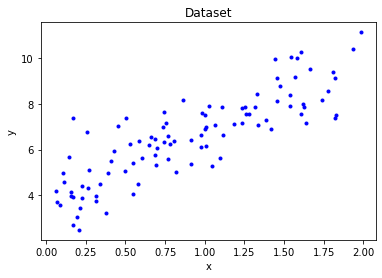

In [3]:
plt.plot(x, y, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dataset')
plt.show()

In [4]:
import pandas as pd

In [21]:
data = {"Amount_damaged_equipment": x.flatten(), "Cost": y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,Amount_damaged_equipment,Cost
0,1.663114,9.550852
1,0.983954,7.585039
2,0.501865,7.406568
3,1.419212,6.922292
4,1.277089,7.579557
5,1.109375,7.855800
6,0.145003,5.673120
7,0.314054,3.964581
8,0.314645,3.768611
9,0.696555,6.051621


In [22]:
#Scalling up the data of affected equipment 
df["Amount_damaged_equipment"] = df["Amount_damaged_equipment"] * 1000
df["Amount_damaged_equipment"] = df["Amount_damaged_equipment"].astype(int)
#Scalling up the data of cost
df["Cost"] = df["Cost"] * 10000
df["Cost"] = df["Cost"].astype(int)
df.head(10)


,Amount_damaged_equipment,Cost
0,1663,95508
1,983,75850
2,501,74065
3,1419,69222
4,1277,75795
5,1109,78557
6,145,56731
7,314,39645
8,314,37686
9,696,60516


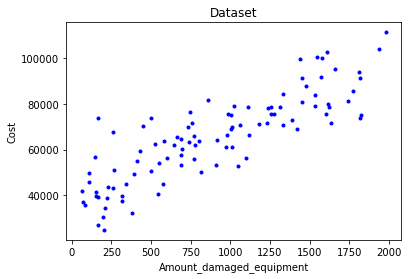

In [28]:
plt.plot(df["Amount_damaged_equipment"], df["Cost"], 'b.')
plt.xlabel('Amount_damaged_equipment')
plt.ylabel('Cost')
plt.title('Dataset')
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
#Fitting the data to the model
#Model gets the input and output parameters
#Model predicts the output based on the input
lin_reg.fit(df['Amount_damaged_equipment'].values.reshape(-1, 1), df['Cost'].values)


LinearRegression()

In [30]:
#parameter of theta 0 and theta 1 respectivly
print("Theta 0: ", lin_reg.intercept_)
print("Theta 1: ", lin_reg.coef_)


Theta 0:  39000.283830832865
Theta 1:  [29.42631013]
